In [25]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [26]:
S0 = 15
r = 0.02
sigma = 0.7
K = 12

T = 1

In [27]:
def d1(S, t):
    return (np.log(S/K) + (r+sigma**2/2)*(T-t)) / (sigma * np.sqrt(T-t))

def d2(S, t):
    return (np.log(S/K) + (r-sigma**2/2)*(T-t)) / (sigma * np.sqrt(T-t))

def phi(x):
    return norm(loc=0, scale=1).cdf(x)

def V(S, t):
    return S*phi(d1(S, t)) - K*np.exp(-r*(T-t))*phi(d2(S, t))


In [28]:
ds = 3
t = np.linspace(0, T, 50)
S = np.linspace(S0-ds, S0+ds)

V_res = np.zeros((len(t)-1, len(S))) 

for i,t_i in enumerate(t[:-1]): 
    for j,s in enumerate(S):
        V_res[i,j] = V(s, t_i)

/tmp/ipykernel_24350/2424193846.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return (np.log(S/K) + (r+sigma**2/2)*(T-t)) / (sigma * np.sqrt(T-t))
/tmp/ipykernel_24350/2424193846.py:2: RuntimeWarning: invalid value encountered in true_divide
  return (np.log(S/K) + (r+sigma**2/2)*(T-t)) / (sigma * np.sqrt(T-t))
/tmp/ipykernel_24350/2424193846.py:5: RuntimeWarning: divide by zero encountered in true_divide
  return (np.log(S/K) + (r-sigma**2/2)*(T-t)) / (sigma * np.sqrt(T-t))
/tmp/ipykernel_24350/2424193846.py:5: RuntimeWarning: invalid value encountered in true_divide
  return (np.log(S/K) + (r-sigma**2/2)*(T-t)) / (sigma * np.sqrt(T-t))


Text(0.5, 0.5, 't')

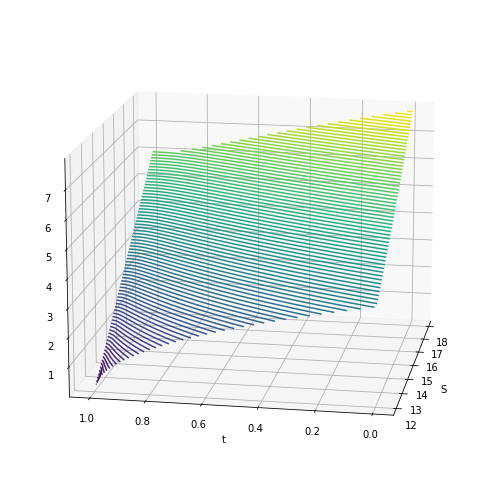

In [29]:
S_plot, t_plot = np.meshgrid(S, t)
V_plot = V(S_plot, t_plot)

fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection="3d")
ax.contour3D(S_plot, t_plot, V_plot, 100)
ax.view_init(15, 190)
ax.set_xlabel("S")
ax.set_ylabel("t")

In [30]:
def Bm(N):
    random_increments = np.random.normal(0.0, 1.0, N)  # the epsilon values
    brownian_motion = np.cumsum(random_increments)  # calculate the brownian motion
    brownian_motion = np.insert(brownian_motion, 0, 0.0) # insert the initial condition
    return brownian_motion

In [31]:
Bmotion = Bm(len(t_plot)-1)#
Bmotion = Bmotion + S0
#print(Bmotion)
#print(t)

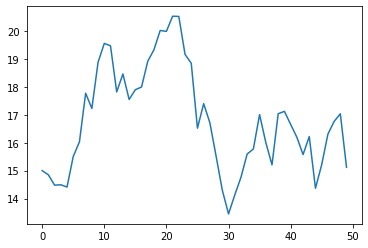

/tmp/ipykernel_24350/2424193846.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.log(S/K) + (r+sigma**2/2)*(T-t)) / (sigma * np.sqrt(T-t))
/tmp/ipykernel_24350/2424193846.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.log(S/K) + (r-sigma**2/2)*(T-t)) / (sigma * np.sqrt(T-t))


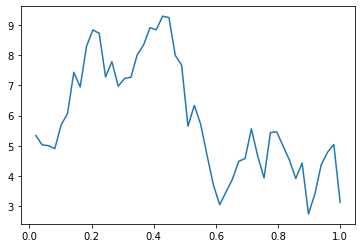

In [32]:
plt.plot(range(0,len(t)), Bmotion)
plt.show()
data = []
for i in range(1,len(t)):
    data.append(V(Bmotion[i], t[i]))

#print(data)
plt.plot(t[1:], data)
plt.show()